In [1]:
import numpy as np
from matplotlib import pyplot as plt
import heat_transfer_coefficient as htc

# 放射熱伝達率のテスト
## 無限平行面と2次元空間を比較する

In [2]:
# 表面温度の設定
theta_1 = 20.0
theta_2 = 15.0

In [3]:
# 面1の放射率
eps1 = 0.9

# 面2の放射率
eps2 = np.arange(1, 11) / 10.0
print(eps2)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [4]:
# 無限平行平板の場合の有効放射率
infinite_emissivity = htc.effective_emissivity_parallel(eps1, eps2)
print(infinite_emissivity)

[0.0989011  0.19565217 0.29032258 0.38297872 0.47368421 0.5625
 0.64948454 0.73469388 0.81818182 0.9       ]


In [5]:
# 有限平行平板の場合の有効放射率
# 通気層厚さをパラメータに設定する
l_d = np.arange(5, 30) / 100.0
print(l_d)

# 有効放射率を計算
finete_emissivity = [[htc.effective_emissivity_two_dimension(
    emissivity_1=eps1,
    emissivity_2=eps,
    l_d=l,
    l_s=0.455) for eps in eps2.tolist()] for l in l_d.tolist()]

[0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18
 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29]


In [20]:
# 放射熱伝達率の計算
infinite_rad_heat_transfer = [htc.radiative_heat_transfer_coefficient(
    theta_1=theta_1,
    theta_2=theta_2,
    effective_emissivity=emissivity) for emissivity in infinite_emissivity]
print(infinite_rad_heat_transfer)

finite_rad_heat_transfer = (htc.radiative_heat_transfer_coefficient(
    theta_1=theta_1,
    theta_2=theta_2,
    effective_emissivity=np.array(finete_emissivity)))

[0.5507508159192807, 1.089528788014229, 1.6167201370533721, 2.1326946488789162, 2.6378065394028702, 3.1323952655409086, 3.616786285985379, 4.091291775400371, 4.55621129533223, 5.011832424865453]
[4.77634817 4.73222911 4.68910085 4.64695938 4.60579916 4.56561319
 4.52639306 4.48812905 4.45081024 4.41442454 4.37895881 4.344399
 4.31073015 4.27793658 4.24600193 4.21490927 4.18464118 4.15517985
 4.12650714 4.0986047  4.07145399 4.04503639 4.01933325 3.99432594
 3.96999591]


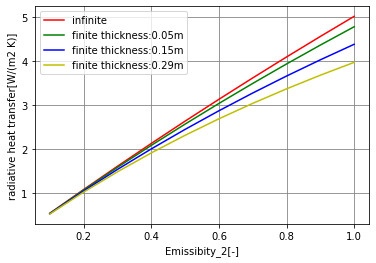

In [10]:
# グラフの描画（放射率別）
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.set_xlabel('Emissibity_2[-]')
ax1.set_ylabel('radiative heat transfer[W/(m2 K)]')

plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='gray', linestyle='-')

plt.plot(eps2, infinite_rad_heat_transfer,linestyle='solid',
         color='r', label='infinite')
plt.plot(eps2, finite_rad_heat_transfer[0,:],linestyle='solid',
         color='g', label='finite thickness:0.05m')
plt.plot(eps2, finite_rad_heat_transfer[10,:],linestyle='solid',
         color='b', label='finite thickness:0.15m')
plt.plot(eps2, finite_rad_heat_transfer[24,:],linestyle='solid',
         color='y', label='finite thickness:0.29m')

plt.legend()
plt.show()

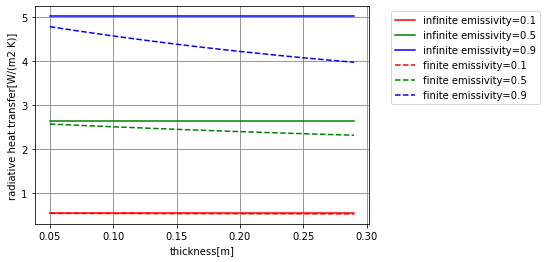

In [23]:
# グラフの描画（中空層厚さ別）
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.set_xlabel('thickness[m]')
ax1.set_ylabel('radiative heat transfer[W/(m2 K)]')

plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='gray', linestyle='-')

plt.plot(l_d, np.full(25,infinite_rad_heat_transfer[0]),linestyle='solid',
         color='r', label='infinite emissivity=0.1')
plt.plot(l_d, np.full(25,infinite_rad_heat_transfer[4]),linestyle='solid',
         color='g', label='infinite emissivity=0.5')
plt.plot(l_d, np.full(25,infinite_rad_heat_transfer[9]),linestyle='solid',
         color='b', label='infinite emissivity=0.9')
plt.plot(l_d, finite_rad_heat_transfer[:,0],linestyle='dashed',
         color='r', label='finite emissivity=0.1')
plt.plot(l_d, finite_rad_heat_transfer[:,4],linestyle='dashed',
         color='g', label='finite emissivity=0.5')
plt.plot(l_d, finite_rad_heat_transfer[:,9],linestyle='dashed',
         color='b', label='finite emissivity=0.9')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()